In [102]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Basic Data Exploration

In [103]:
#load data into data frame
df = pd.read_csv("/content/drive/MyDrive/Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [104]:
# Identify the number of rows and columns in the dataset
print("number of rows :", df.shape[0])
print("number of columns :", df.shape[1])

number of rows : 148654
number of columns : 13


In [105]:
# determine the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [106]:
# check for missing values in each column
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# Descriptive Statistics

In [107]:
# Calculate basic statistics mean, median, mode, minimum, and maximum salary
salary = df.TotalPay
salary.describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [108]:
#determine the range of salaries, and find the standard deviation
maxS = salary.max()
minS = salary.min()
print(f"The range of salaries are from {maxS}$ to {minS}$ ")
print("The standard deviation for salary is :",salary.std())

The range of salaries are from 567595.43$ to -618.13$ 
The standard deviation for salary is : 50517.00527394987


# Data Cleaning

In [109]:
#  Handling missing data
#since the data missed in Notes and  Status columns are completly missed   we can drop them
df_clean = df.dropna(axis = 1, how= "all",)


In [110]:
#since the data missed in BasePay, OvertimePay and OvertimePay  columns are small percentage of data missed we can drop them
df_clean = df_clean.dropna(subset=['BasePay', 'OvertimePay', 'OtherPay'])

In [111]:
#we can fill null values in Benefits column with zeros since its the median
df_clean.fillna(0,inplace = True)

In [112]:
#make sure data is cleaned
df_clean.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# Basic Data Visualization

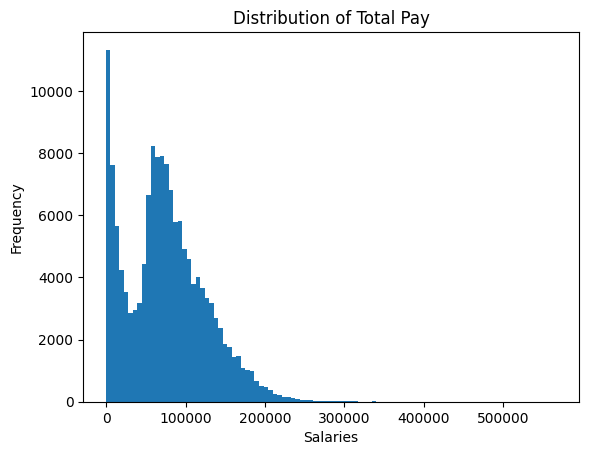

In [113]:
# histograms to visualize the distribution of salaries
df_clean['TotalPay'].plot.hist(bins= 100 )
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Distribution of Total Pay')
plt.show()

In [114]:
#use pie charts to represent the proportion of employees in different departments
#
#see how much job title we have
df_clean['JobTitle'].nunique()

2154

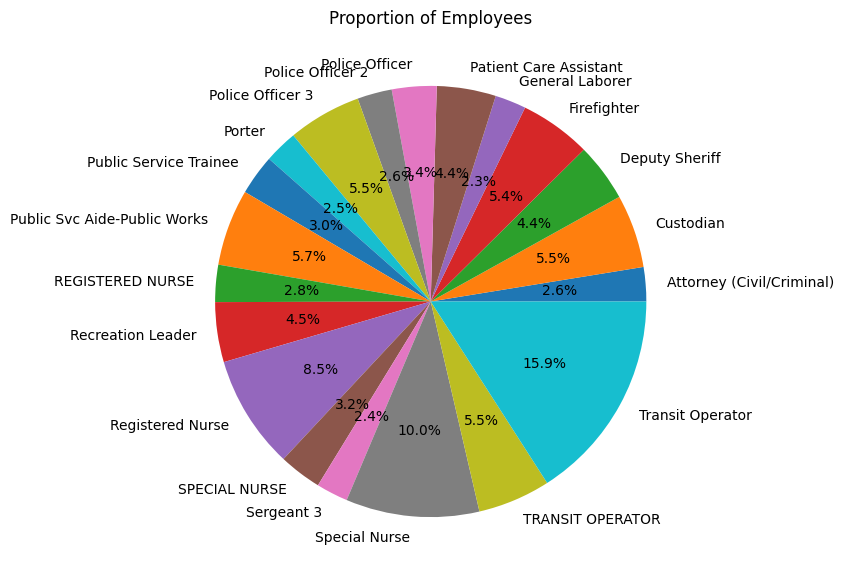

In [116]:
#we need to reduce that number to make the visualisation more usefull but since the data in (JobTitle) is not structured
#and to obtain the department from Job Title we should run analysis for it and thats not basic data visualization
#so I will plot the jobs that has 1000 employee or more

job_group = df_clean.groupby('JobTitle')['Id'].count()

# Filter out JobTitles with less than 1000 employees
job_1000 = job_group[job_group >= 1000]

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(job_1000, labels=job_1000.index, autopct='%1.1f%%')
plt.title('Proportion of Employees')
plt.show()


# Grouped Analysis

In [117]:
#Group the data by one or more columns and calculate summary statistics for each group
#compare the average salaries across different groups
df_clean.groupby('Year')["TotalPay"].describe()
#the highest average salary was in 2013 while the lowest was in 2011


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,71744.103871,47498.706594,0.00,36810.7600,68213.24,102512.68,567595.43
2012,36766.0,74113.262265,49523.904319,0.00,37560.6075,70714.68,104099.17,362844.66
2013,37001.0,78808.285041,52410.194304,15.83,40068.0000,75252.71,110637.36,347102.32
2014,38119.0,75471.836912,51694.645115,-618.13,33468.1250,72366.28,107977.95,471952.64


# Simple Correlation Analysis

In [118]:
# Identify any correlation between salary and all numerical column

corr_sal = df_clean.corr()['TotalPay'].sort_values(ascending=False)
corr_sal

<ipython-input-118-fd00c41c025f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_sal = df_clean.corr()['TotalPay'].sort_values(ascending=False)


TotalPay            1.000000
TotalPayBenefits    0.977153
BasePay             0.954494
Benefits            0.631193
OvertimePay         0.504634
OtherPay            0.474024
Year                0.034733
Id                 -0.208153
Name: TotalPay, dtype: float64

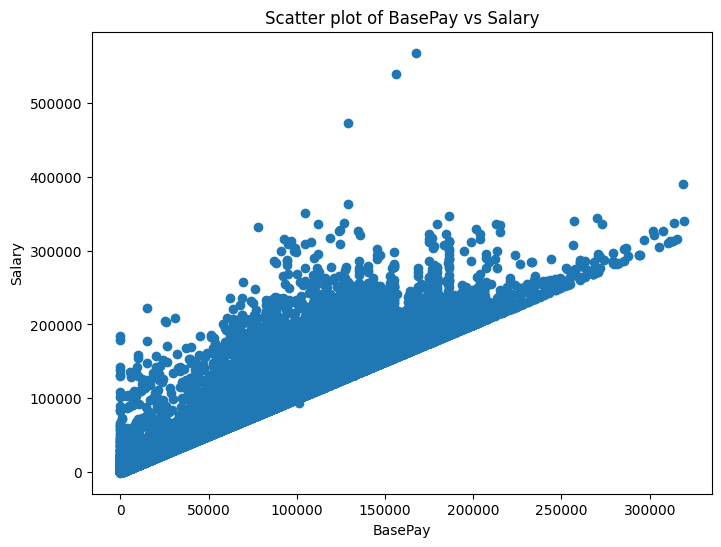

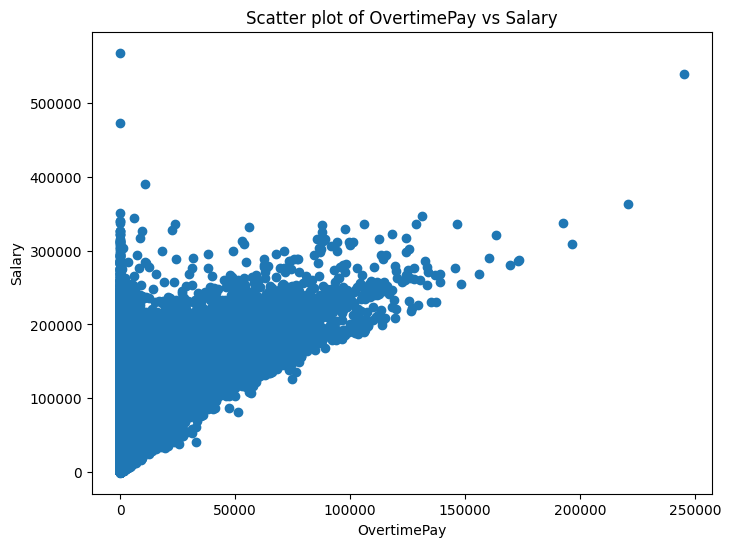

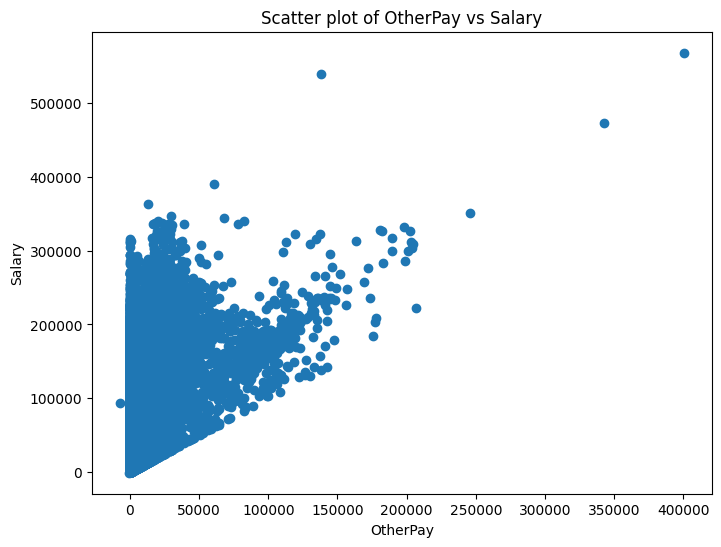

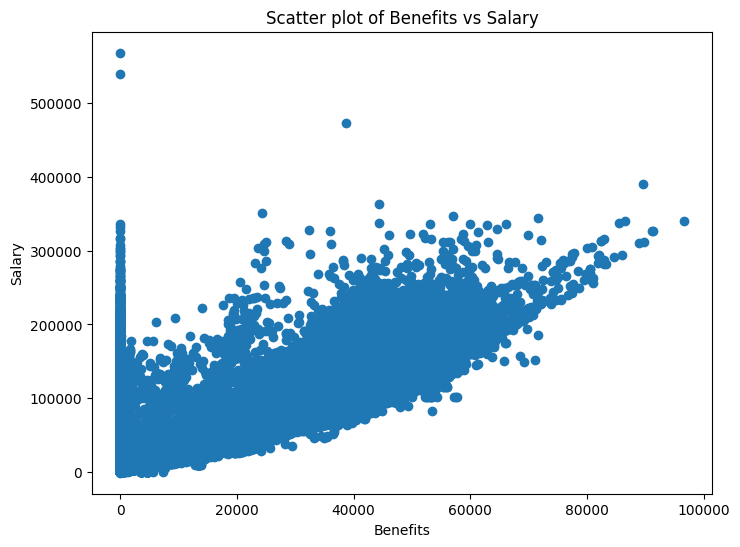

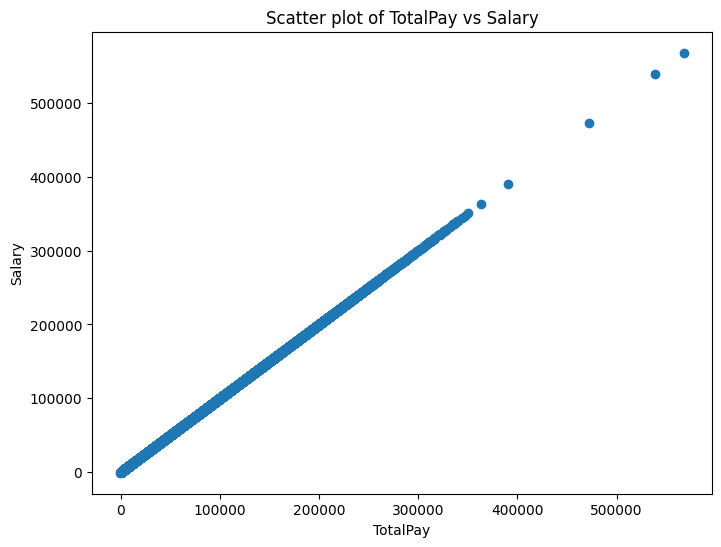

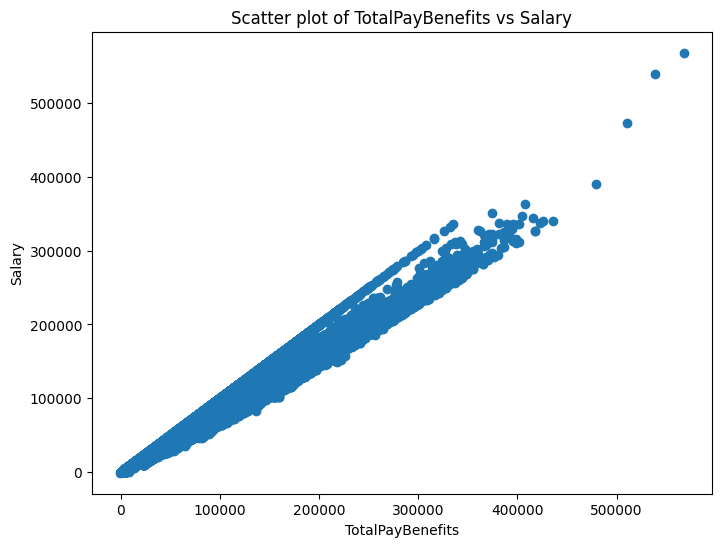

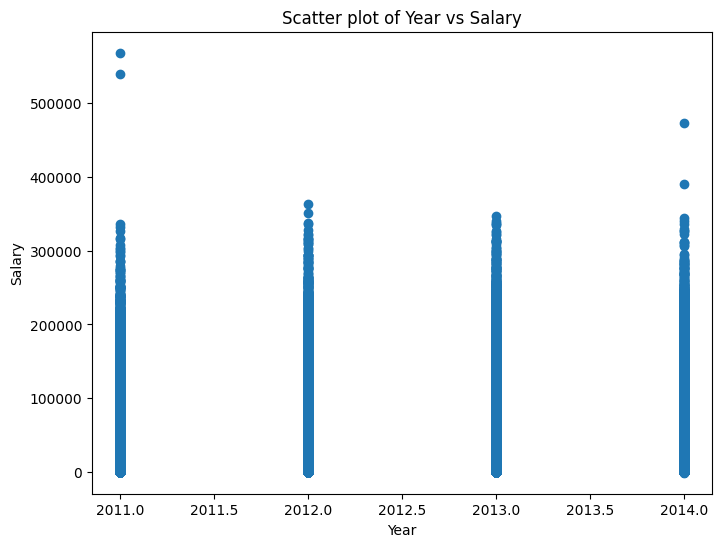

In [119]:
# plot a scatter plot to visualize the relationship
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("Id","TotalPay")

for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_clean[col], df_clean["TotalPay"])
    plt.xlabel(col)
    plt.ylabel("Salary")
    plt.title(f"Scatter plot of {col} vs Salary")
    plt.show()

# Summary of Insights

Different jobs have different roles and pay levels. I suggest looking at the various job roles in different departments to find ways to make them more similar. This can make the organization's structure simpler, so everyone knows what they're responsible for, and it can also make pay more consistent,  Anomalies in salary distribution were identified we should Adjust compensation where necessary, and ensure that salary outliers are worth beaing that high,Salaries often depend on overtime pay and additional bonuses. Companies should concentrate on increasing the base pay component to make it a larger proportion of the total salary.